## Pre-processing
### Attributes analysis

In [1]:
import seaborn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.metrics import recall_score, f1_score, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from IPython.display import Image
import pandas as pd
import seaborn as sns
import xgboost as xgb
import multiprocessing
import matplotlib.pyplot as plt
import graphviz 
from sklearn import tree
from sklearn.tree import plot_tree, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Read csv file
obese_df = pd.read_csv("https://raw.githubusercontent.com/owlbemi/CS4372Assignment2/main/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
# Dataset head
obese_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Check for null values
obese_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
# Check values for target variable
obese_df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [6]:
# Convert target variable to numerical
obese_df["NObeyesdad"].replace(["Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", 
                                "Insufficient_Weight", "Obesity_Type_II", "Obesity_Type_III"], 
                               [0,1,2,3,4,5,6], inplace=True)

In [7]:
obese_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,2


In [8]:
# Convert features to categorical
obese_df["Gender"] = obese_df.Gender.astype('category')
obese_df["family_history_with_overweight"] = obese_df.family_history_with_overweight.astype('category')
obese_df["FAVC"] = obese_df.FAVC.astype('category')
obese_df["CAEC"] = obese_df.CAEC.astype('category')
obese_df["SMOKE"] = obese_df.SMOKE.astype('category')
obese_df["SCC"] = obese_df.SCC.astype('category')
obese_df["CALC"] = obese_df.CALC.astype('category')
obese_df["MTRANS"] = obese_df.MTRANS.astype('category')

In [9]:
# Split data into features and target
y = obese_df["NObeyesdad"]
X = obese_df.drop("NObeyesdad", axis=1)

# Use Target Encoding to convert categorical features
encoder = TargetEncoder(cols=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
X_encoded = encoder.fit_transform(X,y)

In [10]:
# Check mean and standard deviation for each feature
X_encoded.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,3.050687,24.312600,1.701677,86.586058,3.050687,3.050687,2.419043,2.685628,3.054633,3.051405,2.008011,3.050722,1.010298,0.657866,3.052272,3.064738
std,0.262642,6.345968,0.093305,26.191172,0.549110,0.442937,0.533927,0.778039,0.544418,0.055540,0.612953,0.338390,0.850592,0.608927,0.456884,0.394952
min,2.791199,14.000000,1.450000,39.000000,1.888312,1.828571,1.000000,1.000000,0.963765,2.670824,1.000000,1.500776,0.000000,0.000000,1.581329,1.054542
25%,2.791199,19.947192,1.630000,65.473343,3.309965,3.211147,2.000000,2.658738,3.273088,3.059507,1.584812,3.124566,0.124505,0.000000,2.550861,2.733042
50%,2.791199,22.777890,1.700499,83.000000,3.309965,3.211147,2.385502,3.000000,3.273088,3.059507,2.000000,3.124566,1.000000,0.625350,3.354747,3.237975
75%,3.316395,26.000000,1.768464,107.430682,3.309965,3.211147,3.000000,3.000000,3.273088,3.059507,2.477420,3.124566,1.666678,1.000000,3.354747,3.237975
max,3.316395,61.000000,1.980000,173.000000,3.309965,3.211147,3.000000,4.000000,3.273088,3.059507,3.000000,3.124566,3.000000,2.000000,3.354747,3.237975


In [11]:
# Standardize dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [12]:
# Check mean and standard deviation of scaled features
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,1.407159e-15,-4.823567e-16,-6.476213e-16,-1.786349e-15,3.907606e-17,8.490550e-15,2.861020e-16,-6.844359e-16,9.238149e-15,-4.106037e-15,3.811888e-16,4.977623e-15,2.325105e-16,-8.107757e-17,1.397482e-15,2.621936e-15
std,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00
min,-9.882266e-01,-1.625448e+00,-2.698006e+00,-1.817304e+00,-2.117337e+00,-2.759769e+00,-2.658379e+00,-2.167023e+00,-3.841469e+00,-6.853997e+00,-1.644905e+00,-4.581439e+00,-1.188039e+00,-1.080625e+00,-3.220274e+00,-5.090930e+00
25%,-9.882266e-01,-6.880656e-01,-7.683883e-01,-8.062914e-01,4.722913e-01,3.623491e-01,-7.850187e-01,-3.456952e-02,4.013593e-01,1.459003e-01,-6.905894e-01,2.182720e-01,-1.041630e+00,-1.080625e+00,-1.097719e+00,-8.400385e-01
50%,-9.882266e-01,-2.418974e-01,-1.263207e-02,-1.369510e-01,4.722913e-01,3.623491e-01,-6.283450e-02,4.041527e-01,4.013593e-01,1.459003e-01,-1.307326e-02,2.182720e-01,-1.210937e-02,-5.341135e-02,6.621943e-01,4.387322e-01
75%,1.011914e+00,2.659641e-01,7.159595e-01,7.960531e-01,4.722913e-01,3.623491e-01,1.088342e+00,4.041527e-01,4.013593e-01,1.459003e-01,7.659959e-01,2.182720e-01,7.718565e-01,5.619968e-01,6.621943e-01,4.387322e-01
max,1.011914e+00,5.782584e+00,2.983646e+00,3.300136e+00,4.722913e-01,3.623491e-01,1.088342e+00,1.689740e+00,4.013593e-01,1.459003e-01,1.618759e+00,2.182720e-01,2.339750e+00,2.204618e+00,6.621943e-01,4.387322e-01


In [13]:
# Combine X and y into new dataframe
obese_scaled = pd.concat([X_scaled, y], axis=1)

# Dataset head
obese_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.401359,0.145900,-0.013073,0.218272,-1.188039,0.561997,-1.097719,0.438732,0
1,1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.401359,-6.853997,1.618759,-4.581439,2.339750,-1.080625,0.662194,0.438732,0
2,-0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.401359,0.145900,-0.013073,0.218272,1.163820,0.561997,-3.220274,0.438732,0
3,-0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.401359,0.145900,-0.013073,0.218272,1.163820,-1.080625,-3.220274,-5.090930,1
4,-0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.401359,0.145900,-0.013073,0.218272,-1.188039,-1.080625,0.662194,0.438732,2


<Axes: >

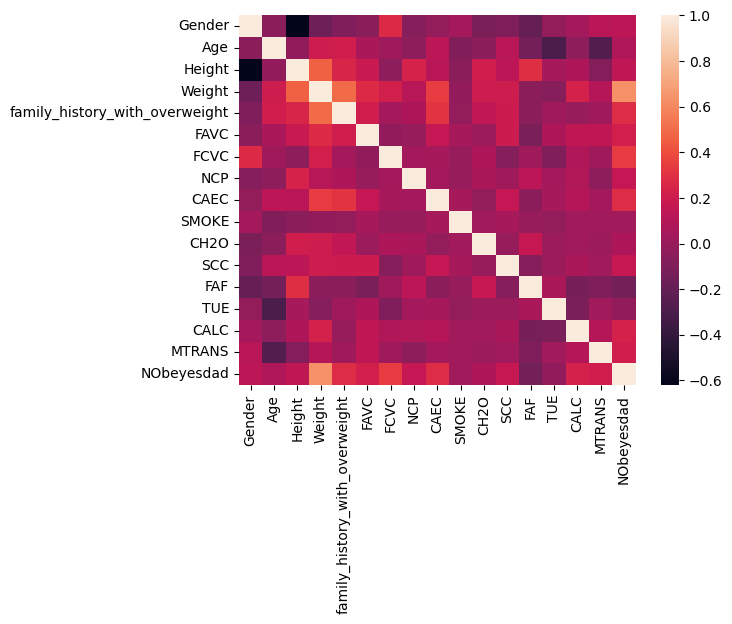

In [14]:
# Create a correlation heatmap
corr_matrix = obese_scaled.corr().round(2)
sns.heatmap(data=corr_matrix)

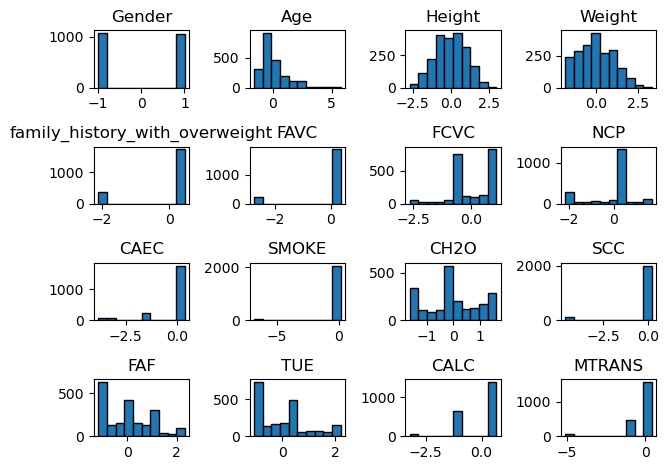

In [15]:
fig, axis = plt.subplots(4, 4)

X = obese_scaled.drop('NObeyesdad', axis = 1)
X.hist(ax = axis, edgecolor = 'black', grid = False)
fig.tight_layout()

plt.show()

In [16]:
# Split scaled data into features and targets
selected_col = ['FAF', 'TUE', 'Weight', 'family_history_with_overweight', 'FCVC']
y = obese_scaled["NObeyesdad"]
X = obese_scaled[selected_col]

# Perform train, test, split on scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Parameter Selection and Tree Visualisation
### Plain Decision Tree

In [19]:
# Build parameter grid for Decision Tree
dt_pipe = Pipeline([('mms', MinMaxScaler()), ('dt', DecisionTreeClassifier())])
params = [{'dt__max_depth': [3, 5, 7, 9], 'dt__min_samples_leaf': [2, 3, 5]}]
gs_dt = GridSearchCV(dt_pipe,param_grid=params, scoring='accuracy', cv=5)
gs_dt.fit(X, y)
print(gs_dt.best_params_)

# Determine best model score
print(gs_dt.score(X_test, y_test))

{'dt__max_depth': 9, 'dt__min_samples_leaf': 3}
0.8770685579196218


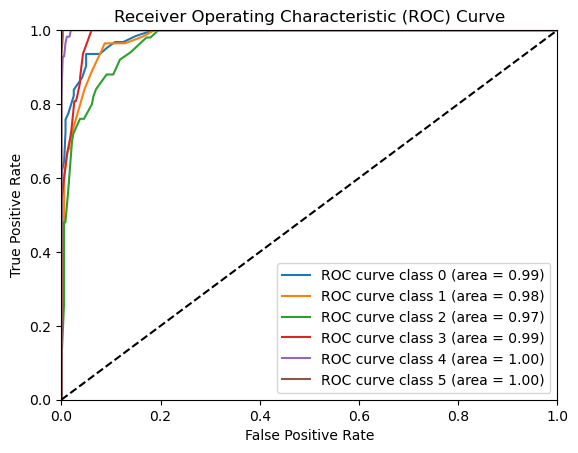

NameError: name 'y_pred' is not defined

In [20]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2 , 3, 4, 5])  # Adjust classes as per your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_proba = gs_dt.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_proba[:, i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve class {i} (area = {roc_auc[i]:.2f})')

# Plotting the diagonal line for chance level
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# print hard classification metrics
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')    

In [ ]:
predictions = gs_dt.predict(X_test)

print("R2 square = ", r2_score(y_test, predictions))
print("MSE = ", mean_squared_error(y_test, predictions))
print("MAE = ", mean_absolute_error(y_test, predictions))
print("Explained variance score = ", explained_variance_score(y_test, predictions))

In [ ]:
tree.plot_tree(gs_dt.best_estimator_.named_steps['dt'])

### Random Forest

In [ ]:
# Build parameter grid for Random Forest
rf = RandomForestClassifier()
params = {'max_depth': [5, 7, 9], 'n_estimators': [50, 100, 200], 'max_features': ['sqrt', 'log2']}
gs_rf = GridSearchCV(rf, params, cv=10, scoring='accuracy', return_train_score=False)
gs_rf.fit(X, y)
print(gs_rf.best_params_)

predictions = gs_rf.predict(X_test)
predicted_probas = gs_rf.predict_proba(X_test)

# Determine best model score
print(gs_rf.score(X_test, y_test))

In [ ]:
# Compute the predicted probabilities for each class
y_proba = gs_rf.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_proba[:, i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve class {i} (area = {roc_auc[i]:.2f})')

# Plotting the diagonal line for chance level
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# print hard classification metrics
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

In [ ]:
print("R2 square = ", r2_score(y_test, predictions))
print("MSE = ", mean_squared_error(y_test, predictions))
print("MAE = ", mean_absolute_error(y_test, predictions))
print("Explained variance score = ", explained_variance_score(y_test, predictions))

In [ ]:
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

In [ ]:
tree.plot_tree(gs_rf.best_estimator_.estimators_[49])

### AdaBoost

In [17]:
# Build parameter grid for AdaBoost
ada = AdaBoostClassifier()
parameters = {'n_estimators' : [50, 70, 90, 120, 180, 200], 'learning_rate' : [0.001, 0.01, 0.1, 1, 10]}
gs_ada = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
gs_ada.fit(X, y)
print(gs_ada.best_params_)

# Determine best model score
print(gs_ada.score(X_test, y_test))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ysasa\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'learning_rate': 0.001, 'n_estimators': 50}
0.3877068557919622


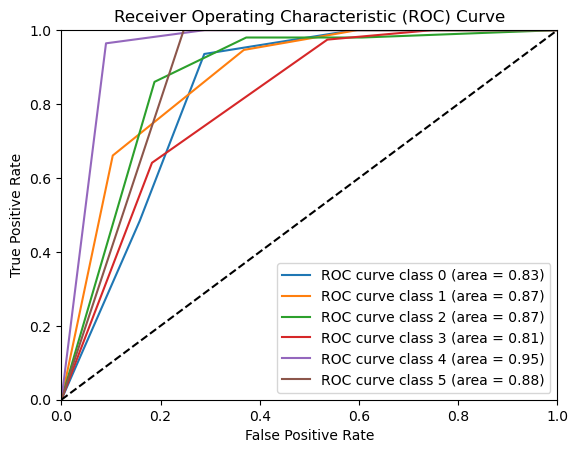

In [21]:
# Compute the predicted probabilities for each class
y_proba = gs_ada.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_proba[:, i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve class {i} (area = {roc_auc[i]:.2f})')

# Plotting the diagonal line for chance level
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
# print hard classification metrics
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

NameError: name 'y_pred' is not defined

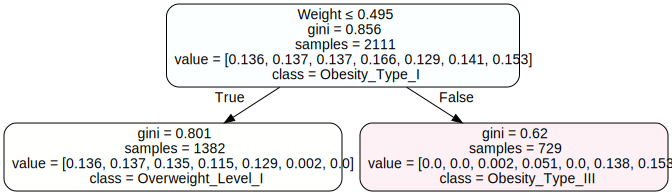

In [23]:
# Create tree for AdaBoost
best_ada = gs_ada.best_estimator_
dot_data = tree.export_graphviz(best_ada.estimators_[0], out_file=None,
                                feature_names=X.columns,
                                class_names= ["Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", 
                                              "Obesity_Type_I", "Insufficient_Weight", "Obesity_Type_II", "Obesity_Type_III"],
                                filled=True, rounded=True,
                                special_characters=True)

# Visualize tree
graph = graphviz.Source(dot_data, format="png")
graph

### XGBoost

In [24]:
# Build parameter grid for XGBoost
xg = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count() // 2)
parameters = {'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}
gs_xg = GridSearchCV(xg, parameters, verbose=1, n_jobs=2)
gs_xg.fit(X, y)
print(gs_xg.best_params_)

# Determine best model score
print(gs_xg.score(X_test, y_test))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 6, 'n_estimators': 100}
0.9851887822151184


In [ ]:
# Compute the predicted probabilities for each class
y_proba = gs_xg.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_proba[:, i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve class {i} (area = {roc_auc[i]:.2f})')

# Plotting the diagonal line for chance level
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# print hard classification metrics
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

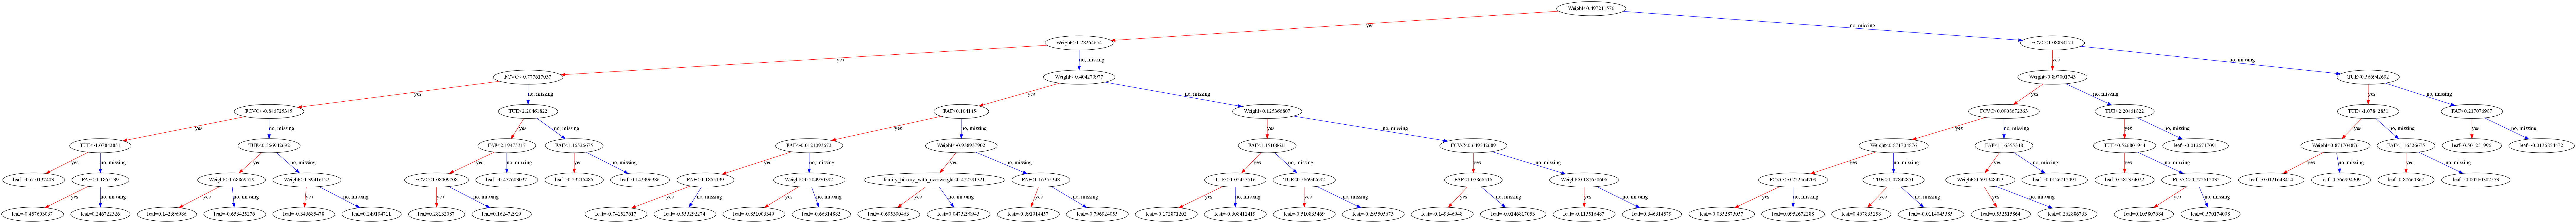

In [26]:
# Create and visualize tree for XGBoost
best_xg = gs_xg.best_estimator_
graph = xgb.to_graphviz(best_xg, num_trees=0)
graph.render("xgboost_tree", format="png", cleanup=True)

# Save image
Image("xgboost_tree.png")

## Further Analyses
### ROC Curve (Random Forest Classifier)

### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, cmap='crest')
plt.show()